This code has been written to be reviewed by recruitment managers at intentico.ai.

For this classification problem I have procured datasets available on github.
1. https://gist.github.com/mbejda/9b93c7545c9dd93060bd
2. https://gist.github.com/mbejda/7f86ca901fe41bc14a63

THese datasets have been retrieved from public records. (name,gender,race)

My appreach here will be to try different machine learning classifiers to see which will give me the best results in terms of accuracy and trhen use that model to make predictions.

In [0]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Checking if the files are available
!ls "drive/My Drive"

In [0]:
#Importing dependencies 
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:
#Reading the .CSV file and storing it as a pandas dataframe
df_male = pd.read_csv("drive/My Drive/Indian-Male-Names.csv")
df_female = pd.read_csv("drive/My Drive/Indian-Female-Names.csv") 

In [0]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14845 entries, 0 to 14844
Data columns (total 3 columns):
name      14821 non-null object
gender    14845 non-null object
race      14845 non-null object
dtypes: object(3)
memory usage: 348.0+ KB


In [0]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 3 columns):
name      15351 non-null object
gender    15382 non-null object
race      15382 non-null object
dtypes: object(3)
memory usage: 360.6+ KB


In [0]:
df_male.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [0]:
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
   
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [0]:
missing_values_table(df_female)

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
name,31,0.2


In [0]:
missing_values_table(df_male)

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
name,24,0.2


In [0]:
#Getting rid of rows with missing values
df_female = df_female.dropna()
df_male = df_male.dropna()

In [0]:
missing_values_table(df_female)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [0]:
missing_values_table(df_male)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [0]:
#Merging the dataframes together
df = pd.concat([df_male,df_female])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30172 entries, 0 to 15381
Data columns (total 3 columns):
name      30172 non-null object
gender    30172 non-null object
race      30172 non-null object
dtypes: object(3)
memory usage: 942.9+ KB


In [0]:
# Checking for Missing Values
df.isnull().isnull().sum()

name      0
gender    0
race      0
dtype: int64

In [0]:
# Number of Female Names
df[df.gender == 'f'].size

46053

In [0]:
# Number of Male Names
df[df.gender == 'm'].size

44463

In [0]:
df_names = df

In [0]:
# Replacing All F and M with 0 and 1 respectively
df_names.gender.replace({'f':0,'m':1},inplace=True)

In [0]:
df_names.dtypes

name      object
gender     int64
race      object
dtype: object

In [0]:
#Defining feature train
Xfeatures =df_names['name']

In [0]:
# Feature Extraction 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [0]:
cv.get_feature_names()

In [0]:

# Features 
X
# Labels
y = df_names.gender

In [0]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
scores = []

In [0]:
# Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf_score = clf.score(X_test,y_test)
scores.append(clf_score)
clf_score

0.9120216932811087

In [0]:
# Accuracy of our Model
print("Accuracy of Naive Bayes Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Naive Bayes Model 91.20216932811087 %


In [0]:
# KNN classifier Model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
scores.append(knn_score)
knn_score

0.8345887315456463

In [0]:
# Accuracy of our Model
print("Accuracy of K-nearest Neighbour Model",knn.score(X_test,y_test)*100,"%")

Accuracy of K-nearest Neighbour Model 83.45887315456463 %


In [0]:
# Support Vector Classification model
svc = SVC(gamma='auto')
svc.fit(X_train, y_train) 
svc_score = svc.score(X_test,y_test)
scores.append(svc_score)
svc_score

0.5045696494928191

In [0]:
# Accuracy of our Model
print("Accuracy of Support Vector Classification Model",svc.score(X_test,y_test)*100,"%")

Accuracy of Support Vector Classification Model 50.45696494928191 %


In [0]:
scores

[0.9120216932811087, 0.8345887315456463, 0.5045696494928191]

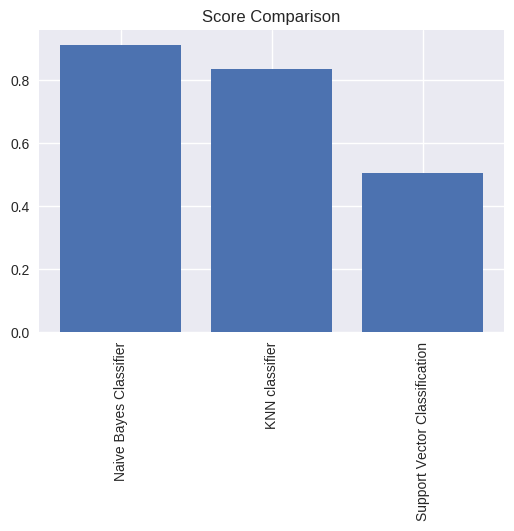

In [0]:
figure(num=0, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
height = scores
bars = ["Naive Bayes Classifier","KNN classifier","Support Vector Classification"]
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title("Score Comparison")
plt.bar(y_pos, height)

# Create names on the y-axis
plt.xticks(y_pos, bars,rotation='vertical')
 
# Show graphic
plt.show()

Naive Bayes Model has the greatest accuracy of 91.2% . Hence, this is the choice I will use for making predictions. 

In [0]:
# A function to predict gender
def genderpredictor(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    if clf.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In [0]:
genderpredictor("Yash")

Male


In [0]:
genderpredictor("Priya")

Female


In [0]:
genderpredictor("Raju")

Male


Possible improvements:
1. I have not done much data cleaning and I know for a fact that there are some very blatant discrepancies in the dataset. Removing them will go a long way in improving the accuracy.
2. I have also not tried any deep learning techniques like LSTM cells here. They might prove to be more accurate.
